<a href="https://colab.research.google.com/github/ashdiqqi/PCVK_Ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

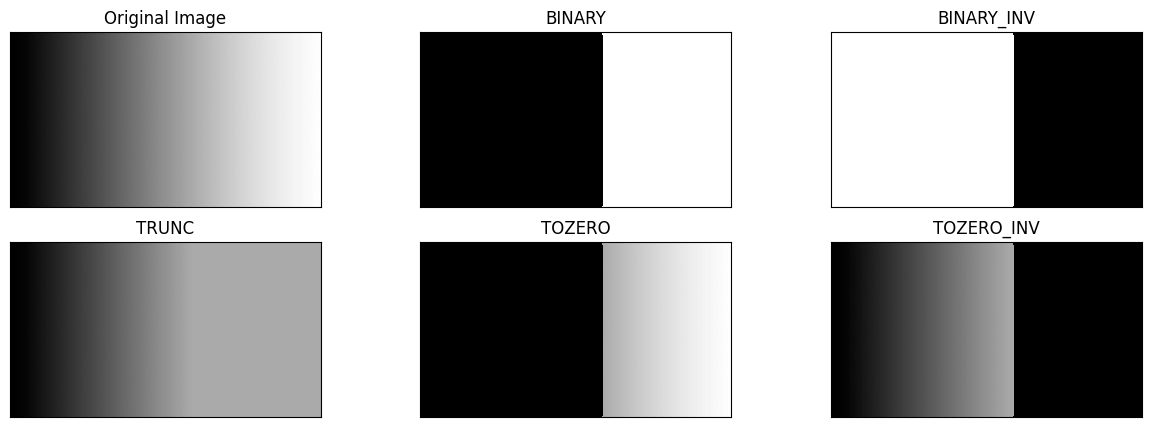

In [9]:
filename = ('/content/drive/MyDrive/Assets/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selainitu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

In [16]:
import numpy as np

# Fungsi untuk menghitung Otsu's threshold secara manual
def otsu_threshold(image):
    pixel_counts = np.bincount(image.ravel(), minlength=256)
    total_pixels = image.size

    current_max, threshold = 0, 0
    sum_total, sum_foreground, weight_background, weight_foreground = 0, 0, 0, 0

    for i in range(256):
        sum_total += i * pixel_counts[i]

    for i in range(256):
        weight_background += pixel_counts[i]
        if weight_background == 0:
            continue

        weight_foreground = total_pixels - weight_background
        if weight_foreground == 0:
            break

        sum_foreground += i * pixel_counts[i]

        mean_background = sum_foreground / weight_background
        mean_foreground = (sum_total - sum_foreground) / weight_foreground

        # Varians antar-kelas
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2

        # Cari nilai threshold yang memaksimalkan varians antar-kelas
        if between_class_variance > current_max:
            current_max = between_class_variance
            threshold = i

    return threshold



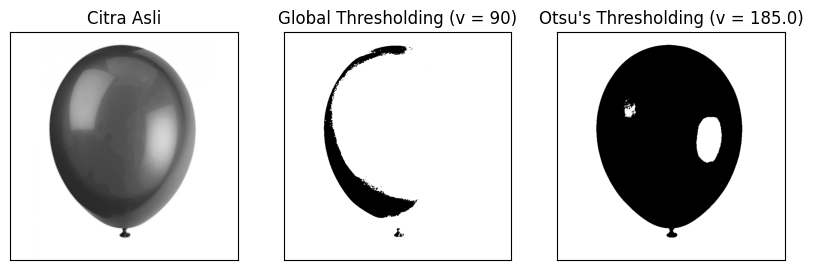

In [19]:
# Citra contoh (grayscale image dalam bentuk numpy array)
filename = '/content/drive/MyDrive/Assets/balloon.jpg'
img = cv.imread(filename, 0)

# Aplikasikan Gaussian Blur (untuk mengurangi noise)
blur = cv.GaussianBlur(img, (5, 5), 0)

# Cari nilai threshold menggunakan algoritma Otsu manual
otsu_thresh = otsu_threshold(blur)

# Global thresholding (v = 90)
thresh = 90
th1 = np.where(blur >= thresh, 255, 0).astype(np.uint8)

# Otsu's Thresholding menggunakan algoritma manual
th2 = np.where(blur >= otsu_thresh, 255, 0).astype(np.uint8)

# Tampilkan hasilnya
x = ("Otsu's Thresholding (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
for i in range(len(citra3)):
    plt.subplot(1, 3, i + 1), plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()
